In [1]:
import torch

print(torch.__version__)
print(torch.version.cuda)

from torch_geometric.data import DataLoader, Data, Dataset

import pickle
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

sys.path.append("..")
from gnn_tools.graphs import customDataset

%matplotlib inline

1.12.1
None


In [2]:
dataset_train = customDataset()
dataset_test = customDataset()

path_to_save = "./"
dir_name = "2L_nominal"

dataset_train.download_from("{}/{}_{}".format(path_to_save, dir_name, "Even"))
dataset_test.download_from("{}/{}_{}".format(path_to_save, dir_name, "Odd"))

Done
Done


In [3]:
loader_train = DataLoader(dataset_train, batch_size=10000, shuffle=True, num_workers=3)
loader_test = DataLoader(dataset_test, batch_size=10000, shuffle=True, num_workers=3)

/Users/cbirchsy/opt/anaconda3/envs/hep-gnn-project/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [4]:
cuda = torch.device("cuda")  # requires cuda gpu
cpu = torch.device("cpu")

In [5]:
from gnn_tools.train import runTraining
from gnn_tools.model import MPGNN_1L, MPGNN_2L

In [7]:
def trainModel(model, loader_train, loader_test, outfile):
    model = model.to(cpu)
    optimizer = torch.optim.Adam(
        model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, amsgrad=False
    )
    criterion = torch.nn.BCELoss(reduction="none")

    model, history = runTraining(model, loader_train, loader_test, 50, 200, outfile, cpu, criterion, optimizer)
    return model, history

In [8]:
model = MPGNN_2L()
model, history = trainModel(model, loader_train, loader_test, "2L_nominal_Even.pt")

Epoch: 1, 	Training loss: 0.3812,	Test loss: 0.3831, 			Training time: 285.33s, 	Evaluation time: 269.10s, 	Total time elapsed: 554.43s
Test loss improved from inf to 0.3831. Saving model to "2L_nominal_Even.pt"




Exception ignored in: <function StorageWeakRef.__del__ at 0x7f891a57f790>
Traceback (most recent call last):
  File "/Users/cbirchsy/opt/anaconda3/envs/hep-gnn-project/lib/python3.8/site-packages/torch/multiprocessing/reductions.py", line 38, in __del__
    self._free_weak_ref(self.cdata)
  File "/Users/cbirchsy/opt/anaconda3/envs/hep-gnn-project/lib/python3.8/site-packages/torch/storage.py", line 640, in _free_weak_ref
    @classmethod
KeyboardInterrupt: 


RuntimeError: DataLoader worker (pid(s) 56056, 56059) exited unexpectedly

Epoch: 1, 	Training loss: 1.7772,	Test loss: 1.6492, 			Training time: 23.00s, 	Evaluation time: 21.44s, 	Total time elapsed: 44.44s
Test loss improved from inf to 1.6492. Saving model to "2L_nominal_Odd.pt"


Epoch: 2, 	Training loss: 1.4782,	Test loss: 1.3515, 			Training time: 22.62s, 	Evaluation time: 21.43s, 	Total time elapsed: 88.50s
Test loss improved from 1.6492 to 1.3515. Saving model to "2L_nominal_Odd.pt"


Epoch: 3, 	Training loss: 1.3526,	Test loss: 1.2947, 			Training time: 22.72s, 	Evaluation time: 21.45s, 	Total time elapsed: 132.69s
Test loss improved from 1.3515 to 1.2947. Saving model to "2L_nominal_Odd.pt"


Epoch: 4, 	Training loss: 1.3246,	Test loss: 1.2872, 			Training time: 23.55s, 	Evaluation time: 21.21s, 	Total time elapsed: 177.46s
Test loss improved from 1.2947 to 1.2872. Saving model to "2L_nominal_Odd.pt"


Epoch: 5, 	Training loss: 1.3044,	Test loss: 1.2526, 			Training time: 22.80s, 	Evaluation time: 21.52s, 	Total time elapsed: 221.80s
Test loss impro

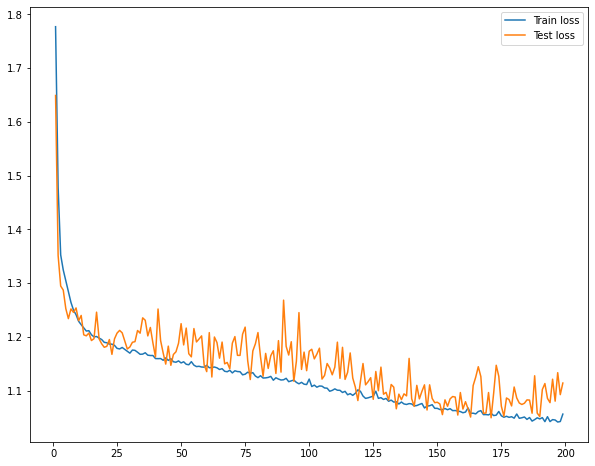

In [ ]:
model = MPGNN_2L()
trainModel(model, loader_train, loader_test, "2L_nominal_Odd.pt")